<a href="https://colab.research.google.com/github/jeffersonramelo/Textual-Analysis/blob/main/Analise_de_sentimentos_COPOM_EN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages("readxl")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
library(readxl)

caminho_arquivo <- "/content/atascopomEN_ML.xlsx"
df <- read_excel(caminho_arquivo)


In [ ]:
head(df)

In [ ]:
summary(df)


In [ ]:
df[214, "texto"]

texto
<chr>


Lei de Zipf(1949) correlação inversa entre frequencia das palavras e seu ranking. Segundo Pao (1978) palavras das extremidades devem ser eliminadas da análise, as mais frequentes são artigos, preposições e conjunções e as menos frequentes são palavras raras. Ambas não possui significado para análise de sentimento.

In [ ]:
frequencia <- table(df$texto)


In [ ]:
ranking <- rank(-frequencia, ties.method = "min")

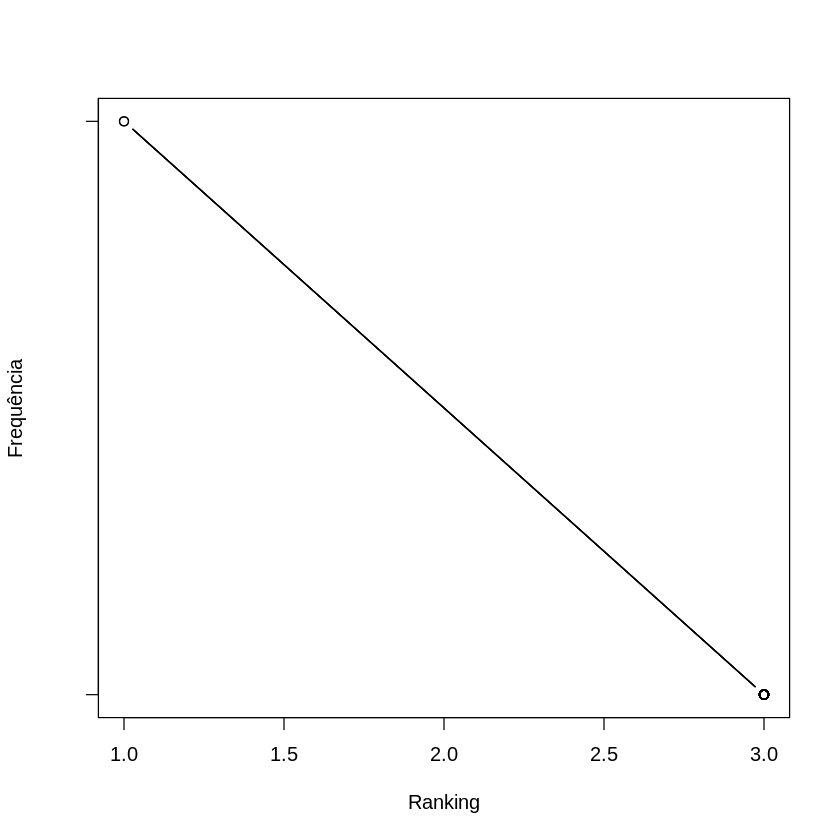

In [ ]:
plot(ranking, frequencia, type = "b", xlab = "Ranking", ylab = "Frequência")

In [3]:
#TRATAMENTO DOS DADOS, STOP WORS, MINUSCULAS, PONTUAÇÃO, ETC.
install.packages("dplyr")
install.packages("tm")
install.packages("stringr")
install.packages("SnowballC")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘NLP’, ‘Rcpp’, ‘slam’, ‘BH’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
library(dplyr)
library(tm)
library(stringr)
library(SnowballC)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: NLP



In [5]:
# Carregar lista de stopwords em inglês do pacote tm
data("stopwords")

Warning message in data("stopwords"):
“data set ‘stopwords’ not found”


In [6]:
# Definir lista de stopwords em inglês
stopwords_en <- stopwords("en")

In [7]:
# Função para pré-processamento do texto
preprocess_text <- function(text) {
  # Converter para minúsculas
  text <- tolower(text)
  
  # Remover números
  text <- str_remove_all(text, "[0-9]")
  
  # Remover sinais de pontuação e caracteres especiais
  text <- str_remove_all(text, "[[:punct:]]")
  text <- str_remove_all(text, "[^[:alnum:]\\s]")
  
  # Remover stopwords
  text <- str_split(text, "\\s+") %>%
    unlist() %>%
    setdiff(stopwords_en) %>%
    paste(collapse = " ")
  
  # Stemming
  text <- wordStem(text)
  
  return(text)
}

# Aplicar pré-processamento do texto
df$texto <- sapply(df$texto, preprocess_text)

In [ ]:
df[214, "texto"]

In [8]:
#TOKENIZAR
# Instalar pacotes necessários
install.packages("tidytext")
library(tidytext)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘janeaustenr’, ‘tokenizers’




In [9]:
# Criar novo data frame com as palavras tokenizadas
df_tokenized <- df %>%
  select(ata, texto) %>%
  unnest_tokens(tokenizado, texto)

# Visualizar o novo data frame
head(df_tokenized)

Warning message:
“Outer names are only allowed for unnamed scalar atomic inputs”


ata,tokenizado
<dbl>,<chr>
254,th
254,minutes
254,meeting
254,monetary
254,policy
254,committee


In [10]:
#baixar dicionário Loughran e Macdonalds 2011
# Carregar o pacote readr
library(readr)

# Ler o arquivo CSV
dicio <- read_csv("/content/dicionario_LoughranMcdonals.csv")

# Exibir os dados
print(dicio)

Rows: 4150 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): word, sentiment

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 4,150 × 2
   word         sentiment
   <chr>        <chr>    
 1 abandon      negative 
 2 abandoned    negative 
 3 abandoning   negative 
 4 abandonment  negative 
 5 abandonments negative 
 6 abandons     negative 
 7 abdicated    negative 
 8 abdicates    negative 
 9 abdicating   negative 
10 abdication   negative 
# ℹ 4,140 more rows


In [11]:
# Stemização das palavras do dicionário
dicio <- dicio %>%
  mutate(stemmed_word = SnowballC::wordStem(word))

In [12]:
print(dicio)

# A tibble: 4,150 × 3
   word         sentiment stemmed_word
   <chr>        <chr>     <chr>       
 1 abandon      negative  abandon     
 2 abandoned    negative  abandon     
 3 abandoning   negative  abandon     
 4 abandonment  negative  abandon     
 5 abandonments negative  abandon     
 6 abandons     negative  abandon     
 7 abdicated    negative  abdic       
 8 abdicates    negative  abdic       
 9 abdicating   negative  abdic       
10 abdication   negative  abdic       
# ℹ 4,140 more rows


In [13]:
print(df_tokenized)

# A tibble: 176,691 × 2
     ata tokenizado
   <dbl> <chr>     
 1   254 th        
 2   254 minutes   
 3   254 meeting   
 4   254 monetary  
 5   254 policy    
 6   254 committee 
 7   254 copom     
 8   254 may       
 9   254 bcbgovbr  
10   254 date      
# ℹ 176,681 more rows


In [14]:
# Cruzar os dados do dicionário com os dados do texto"
merged_df <- merge(df_tokenized, dicio, by.x = "tokenizado", by.y = "stemmed_word", all.x = TRUE)

In [15]:
print(merged_df)

              tokenizado ata            word    sentiment
1                     aa  94            <NA>         <NA>
2              abandoned 201            <NA>         <NA>
3              abandoned 200            <NA>         <NA>
4              abandoned 153            <NA>         <NA>
5              abandoned  78            <NA>         <NA>
6          abastecimento 108            <NA>         <NA>
7                 abated  64            <NA>         <NA>
8                   abcr 121            <NA>         <NA>
9                   abcr 120            <NA>         <NA>
10               ability 218            <NA>         <NA>
11               ability 217            <NA>         <NA>
12               ability 119            <NA>         <NA>
13               ability  64            <NA>         <NA>
14               ability  54            <NA>         <NA>
15                  able 228            <NA>         <NA>
16                  able 227            <NA>         <NA>
17            

In [16]:
# Apagar NAs da coluna sentimento
merged_df <- merged_df %>%
  filter(!is.na(sentiment))

In [17]:
merged_df

tokenizado,ata,word,sentiment
<chr>,<dbl>,<chr>,<chr>
abrupt,106,abrupt,negative
abrupt,106,abruptness,negative
abrupt,144,abrupt,negative
abrupt,144,abruptness,negative
abrupt,108,abrupt,negative
abrupt,108,abruptness,negative
abrupt,234,abrupt,negative
abrupt,234,abruptness,negative
abrupt,109,abrupt,negative


In [18]:
# Contar o número de sentimentos positivos e negativos pela coluna "ata"
sentiment_counts <- merged_df %>%
  group_by(ata, sentiment) %>%
  summarise(count = n())

`summarise()` has grouped output by 'ata'. You can override using the `.groups`
argument.


In [19]:
print(sentiment_counts)

# A tibble: 1,100 × 3
# Groups:   ata [210]
     ata sentiment    count
   <dbl> <chr>        <int>
 1    42 constraining     3
 2    42 litigious        3
 3    42 negative        32
 4    42 positive         4
 5    42 superfluous      1
 6    42 uncertainty      7
 7    43 constraining     2
 8    43 litigious        3
 9    43 negative        24
10    43 positive         7
# ℹ 1,090 more rows


In [ ]:
install.packages("dplyr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [20]:
library(dplyr)

In [21]:
# Criar a nova variável "sentiment_ata" baseada na contagem de sentimentos
sentiment_ata <- sentiment_counts %>%
  group_by(ata) %>%
  summarise(sentiment_ata = ifelse(sum(count[sentiment == "positive"]) > sum(count[sentiment == "negative"]), "positive",
                                  ifelse(sum(count[sentiment == "negative"]) > sum(count[sentiment == "positive"]), "negative", "neutral")))


In [22]:
sentiment_ata

ata,sentiment_ata
<dbl>,<chr>
42,negative
43,negative
45,negative
46,negative
47,negative
48,negative
50,negative
51,negative
52,negative


In [23]:
table(sentiment_ata$sentiment_ata)


negative  neutral positive 
     177        6       27 

In [27]:
library(dplyr)

# Filtrar as linhas com sentiment_ata igual a "negative"
ata_negative <- sentiment_ata %>% 
  filter(sentiment_ata == "negative") %>%
  select(ata)

# Filtrar as linhas com sentiment_ata igual a "positive"
ata_positive <- sentiment_ata %>% 
  filter(sentiment_ata == "positive") %>%
  select(ata)

# Filtrar as linhas com sentiment_ata igual a "uncertainty"
ata_neutral <- sentiment_ata %>% 
  filter(sentiment_ata == "neutral") %>%
  select(ata)



In [28]:
#saber quais atas deram positive, negative ou neutral
ata_neutral$ata

[1]  66 157 197 198 207 236

Modelos supervisionados